-----------------------------
## Practice Case study: PCA 

-----------------------------

Welcome to the Practice Case on PCA. In this project, we aim to generate and visualize the PCA for auto-mpg dataset and extract insights.

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


#### Loading data

In [240]:
# Load the data
auto_mpg_df = pd.read_csv("auto-mpg.csv")

# Verify read
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [241]:
auto_mpg_df.sample(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
66,17.0,8,304.0,150,3672,11.5,72,amc ambassador sst
342,30.0,4,135.0,84,2385,12.9,81,plymouth reliant
311,32.1,4,98.0,70,2120,15.5,80,chevrolet chevette
237,30.5,4,98.0,63,2051,17.0,77,chevrolet chevette
159,14.0,8,351.0,148,4657,13.5,75,ford ltd
210,19.0,6,156.0,108,2930,15.5,76,toyota mark ii
142,26.0,4,79.0,67,1963,15.5,74,volkswagen dasher
369,34.0,4,112.0,88,2395,18.0,82,chevrolet cavalier 2-door
19,26.0,4,97.0,46,1835,20.5,70,volkswagen 1131 deluxe sedan
226,20.5,6,231.0,105,3425,16.9,77,buick skylark


#### Check the info of the data

In [242]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observation:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [243]:
auto_mpg_df["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [244]:
# dropping car_name
data = auto_mpg_df.drop(columns=["car name"], )

A better approach is to use an index to save the unique and useful info for accessing.

In [245]:
data = auto_mpg_df.set_index(auto_mpg_df['car name']).drop(columns=['car name'])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
car name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70
buick skylark 320,15.0,8,350.0,165,3693,11.5,70
plymouth satellite,18.0,8,318.0,150,3436,11.0,70
amc rebel sst,16.0,8,304.0,150,3433,12.0,70
ford torino,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82
vw pickup,44.0,4,97.0,52,2130,24.6,82
dodge rampage,32.0,4,135.0,84,2295,11.6,82


#### Checking values in horsepower column

In [246]:
# checking if there are values other than digits in the column 'horsepower'
data.loc[ data["horsepower"].str.isdigit() == False ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
car name,,,,,,,
ford pinto,25.0,4,98.0,?,2046,19.0,71
ford maverick,21.0,6,200.0,?,2875,17.0,74
renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80
ford mustang cobra,23.6,4,140.0,?,2905,14.3,80
renault 18i,34.5,4,100.0,?,2320,15.8,81
amc concord dl,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [247]:
# Relacing ? with np.nan
data.replace("?", np.nan, inplace=True)
data.loc[ data["horsepower"].isnull() ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
car name,,,,,,,
ford pinto,25.0,4,98.0,NaN,2046,19.0,71
ford maverick,21.0,6,200.0,NaN,2875,17.0,74
renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80
ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80
renault 18i,34.5,4,100.0,NaN,2320,15.8,81
amc concord dl,23.0,4,151.0,NaN,3035,20.5,82


In [248]:
# Imputing the missing values with median value
data["horsepower"].fillna(data["horsepower"].median(), inplace=True)
data["horsepower"] = data["horsepower"].astype("float64")  # converting the hp column from object data type to float

Migrate from model year to car age which is a more analyzable feature. Ordinal vs. cardinal values.

In [249]:
data['car age'] = 2022 - (1900 + data['model year'])
data.drop(columns=['model year'], inplace=True)

#### Summary Statistics

In [250]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
car age,398.0,45.989950,3.697627,40.0,43.000,46.0,49.000,52.0


**Observation:**

- The average mileage is approx 23 miles per gallon.
- The average number of cylinders is approx 5.
- The average displacement is approx 193 cubic inches with a standard deviation of approx 104 cubic inches.
- The average horsepower is 104.
- The average weight is approx 2970 lbs.
- The average acceleration is approx 15 sec for reaching 0 to 60 mph speed.
- The model year ranges from 1970 to 1982.

#### Let's check the distribution and outliers for each column in the data

mpg
Skew : 0.46


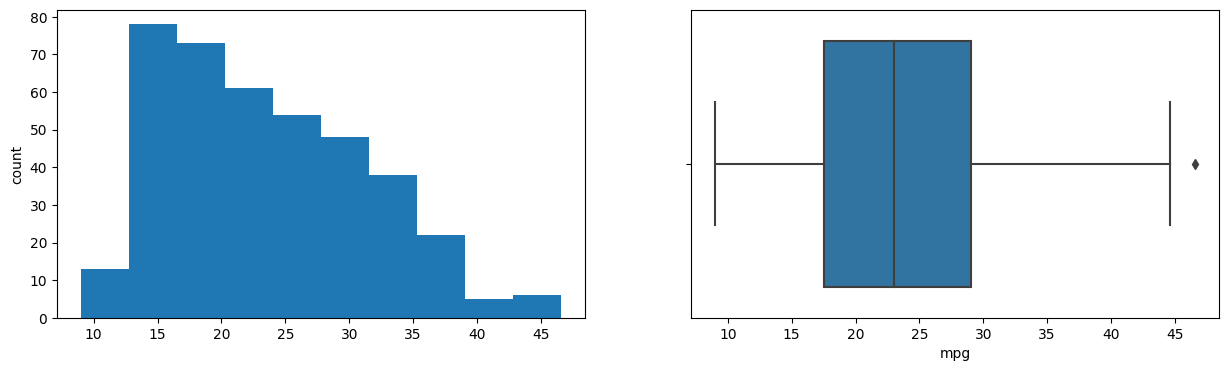

cylinders
Skew : 0.53


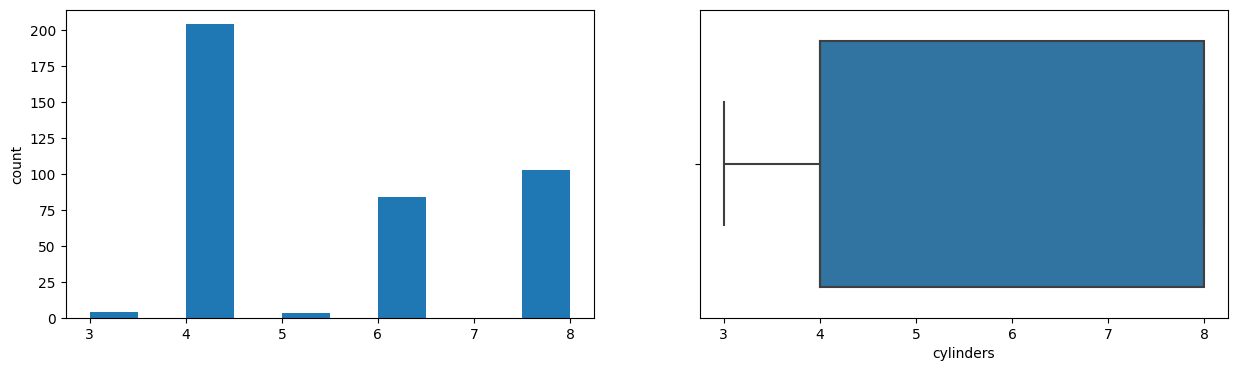

displacement
Skew : 0.72


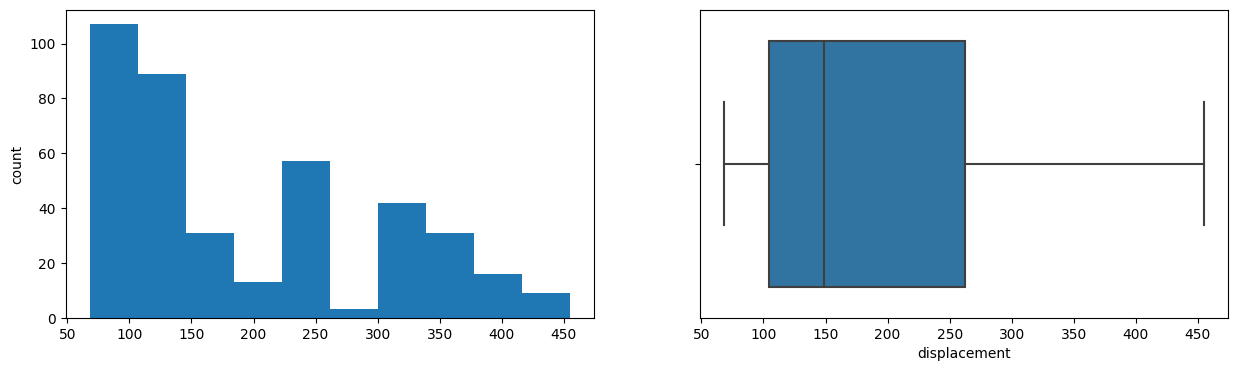

horsepower
Skew : 1.11


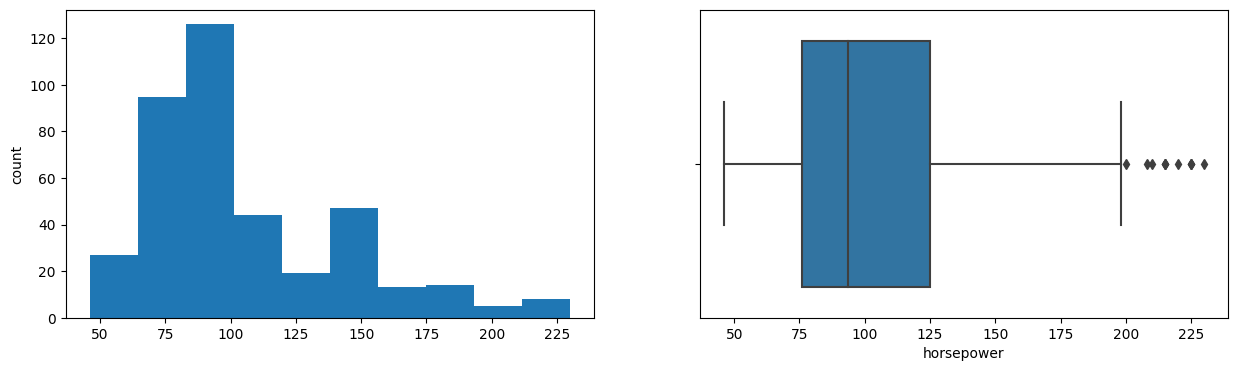

weight
Skew : 0.53


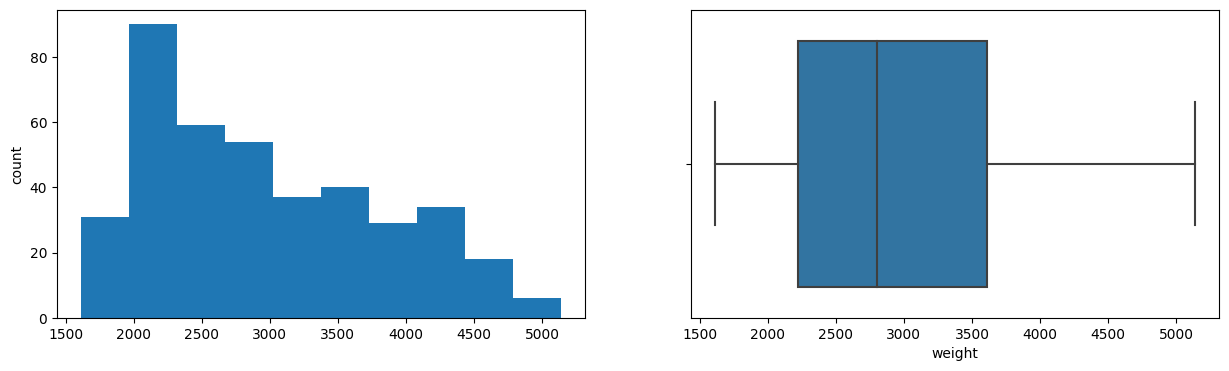

acceleration
Skew : 0.28


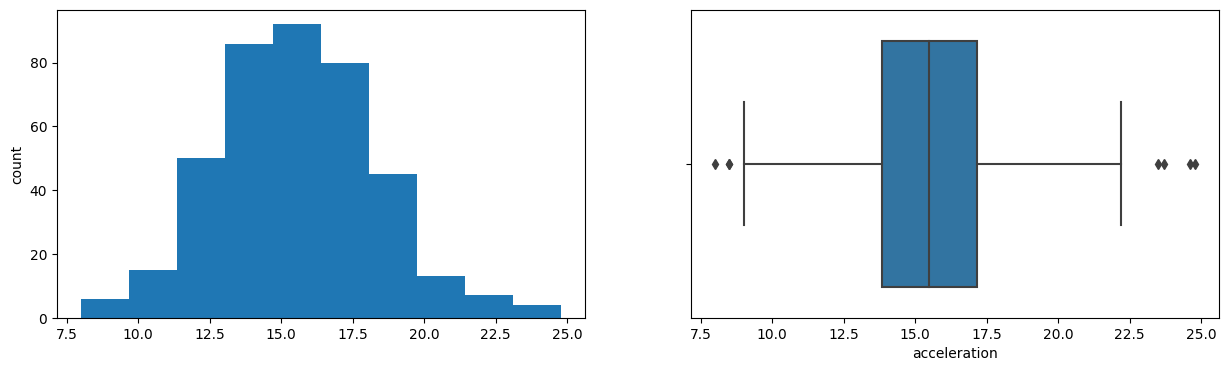

car age
Skew : -0.01


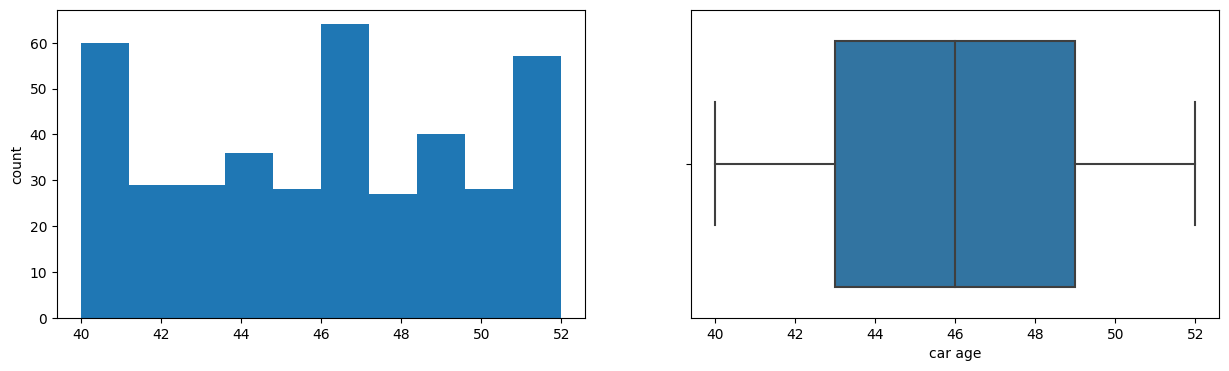

In [251]:
for col in data.columns:
    print(col)
    print("Skew :", round(data[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()


**Observations:**
- The mpg, displacement, weight columns are right skewed.
- The most common number of cylinders is 4.
- The acceleration is normally distributed. 
- Most number of cars are 76 or 77 year model.
- No variable has very extreme values in the data.

#### Checking correlation

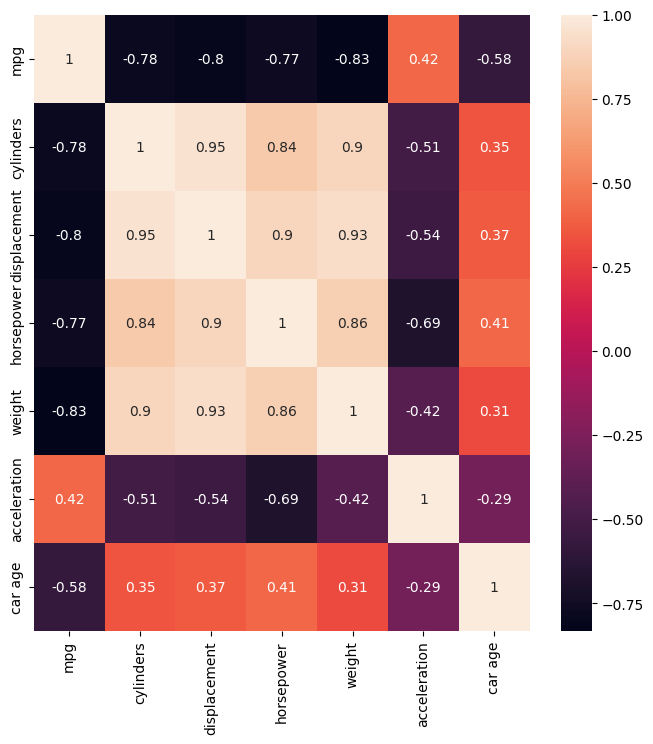

In [252]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()


**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [253]:
# scaling the data
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
data_scaled.index = data.index
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car age
car name,,,,,,,
chevrolet chevelle malibu,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1.627426
buick skylark 320,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1.627426
plymouth satellite,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1.627426
amc rebel sst,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1.627426
ford torino,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1.627426


## Principal Component Analysis

In [254]:
# Defining the number of principal components to generate based on num of columns
# Finding principal components for the data
pca = PCA(n_components=data_scaled.shape[1], random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))
data_pca1.index = data.index
data_pca1


,0,1,2,3,4,5,6
car name,,,,,,,
chevrolet chevelle malibu,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566
buick skylark 320,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518
plymouth satellite,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167
amc rebel sst,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296
ford torino,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301
...,...,...,...,...,...,...,...
ford mustang gl,-1.420970,-1.225252,-0.286402,-0.671666,0.054472,-0.187878,0.101922
vw pickup,-4.094686,-1.279998,1.960384,1.375464,0.740606,0.175097,0.087391
dodge rampage,-1.547254,-1.252540,-1.906999,-0.323768,-0.255922,-0.254531,0.149028


exp_var = [0.71476787 0.1236554  0.10414042 0.02671968 0.01778617 0.00790889
 0.00502158]
cum sum = [0.71476787 0.83842327 0.94256368 0.96928336 0.98706953 0.99497842
 1.        ]


Text(0, 0.5, 'Cumulative Explained Variance')

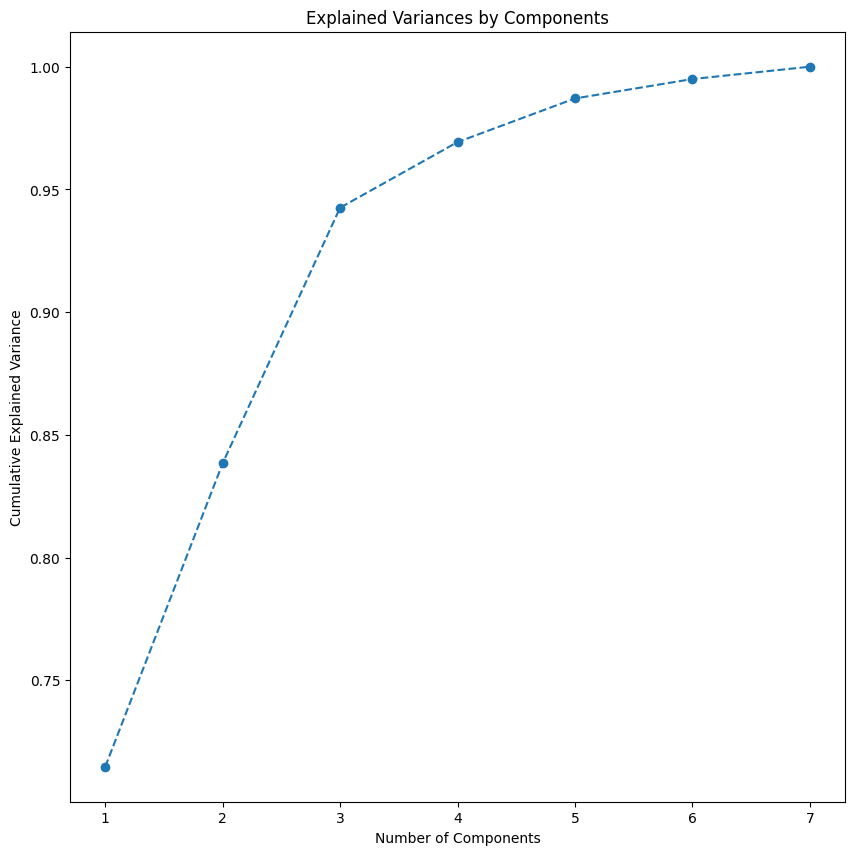

In [264]:

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

print(f"exp_var = {exp_var}")
print(f"cum sum = {exp_var.cumsum()}")

# visualize the explained variance by individual components
plt.figure(figsize=(10, 10))
plt.plot(range(1, 8), exp_var.cumsum(), marker="o", linestyle="--")
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [256]:
# find the least number of components that can explain more than 90% variance
for i, cum_sum in enumerate(exp_var.cumsum()):
    num_of_pcs = i + 1
    if cum_sum > 0.90:
        print("Number of PCs that explain at least 90% variance: ", num_of_pcs)
        break


Number of PCs that explain at least 90% variance:  3


In [257]:
# find the least number of components that can explain more than 90% variance using numpy.
# The cumsum() is an ordered 1D array so the first index (minimum) will be the lowest to past
# our test. Add 1 because numpy array indices start at 0.
print("Number of PCs that explain at least 90% variance: ", 
      np.argwhere(exp_var.cumsum() > 0.9).min() + 1)

Number of PCs that explain at least 90% variance:  3


**Observations**:
-  We can see that out of the 7 original features, we reduced the number of features through principal components to 3, these components explain more than 90% of the original variance.
- So that is about 57% reduction in the dimensionality with a loss of 10% in variance.
- Let us now look at these principal components as a linear combination of original features.

In [258]:
pc_comps = ["PC1", "PC2", "PC3"]
data_pca = pd.DataFrame(
    np.round(pca.components_[:3, :], 2), index=pc_comps, columns=data_scaled.columns
)
data_pca.T


,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
car age,0.23,0.91,0.02


In [259]:
def color_high(val):
    if val <= -0.40:  # you can decide any value as per your understanding
        return "background: pink"
    elif val >= 0.40:
        return "background: skyblue"


data_pca.T.style.applymap(color_high)


,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
car age,0.230000,0.910000,0.020000


**Observations:**

- Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

-0.40 * mpg + 0.42 * cylinders + 0.43 * displacement + 0.42 * horsepower + 0.41 * weight - 0.28 * acceleration - 0.23 * model year

- The first principal component, PC1, is a measure of mpg, cylinders, displacement, horsepower, and weight. PC1 is associated with high scores of all these variables, except mpg, as these variables have positive weights. PC1 is associated with low values of mpg. This principal component seems to capture attributes that generally define cars with heavy engines with high number of cylinders, displacement, horsepower and weight and a a result of heavy engines such cars would have low mileage.
- The second principal component, PC2, is a measure of model year. PC2 is associated with low values of model year.
- The third principal component, PC3, is a measure of the acceleration.

#### We can also visualize the data in 2 dimensions using first two principal components 

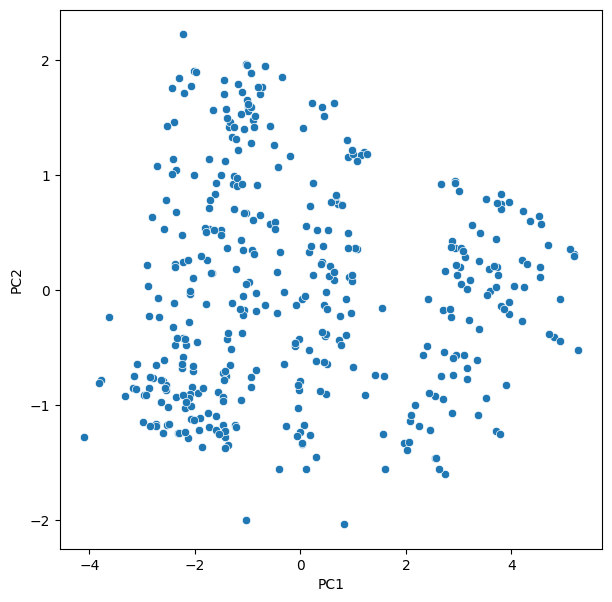

In [260]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=data_pca1[0], y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**Let's try adding hue to the scatter plot**

**Creating scatter plot for first two principal components with hue= 'cylinders'**

Text(0, 0.5, 'PC2')

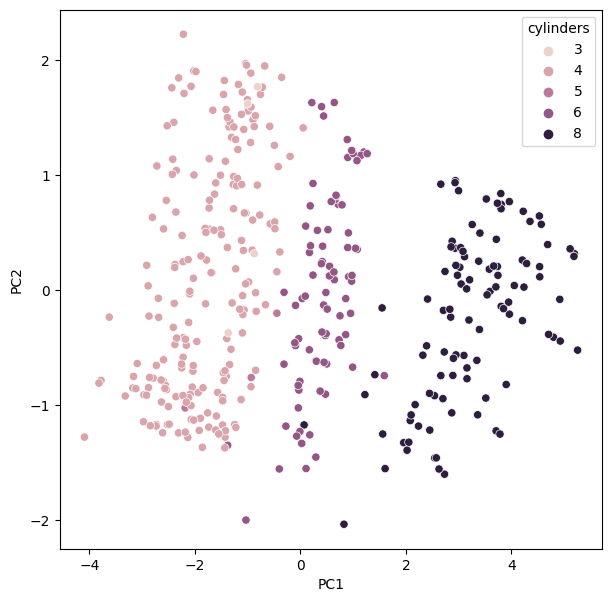

In [261]:
df_concat = pd.concat([data_pca1, data], axis='columns')

plt.figure(figsize=(7, 7))
sns.scatterplot(x=0, y=1, data=df_concat, hue="cylinders")
plt.xlabel("PC1")
plt.ylabel("PC2")


**Observations:**

- We can see there are 3 groups:
    - One with 3, 4, or 5 number of cylinders
    - One with 6 numbers of cylinders
    - One with 8 number of cylinders
- However, the distinction between the groups is not strong and there are some overlaps.